In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
data = {
    "Age": [22, 28, 35, 42, 50, 30, 45, 26, 38, 55],
    "Income": [25000, 40000, 60000, 80000, 100000, 55000, 90000, 30000, 70000, 180000],
    "Website_Time": [15, 35, 25, 40, 20, 50, 30, 45, 28, 18],
    "Discount_Used": [1, 1, 0, 0, 0, 1, 0, 1, 0, 0],
    "Monthly_Spend": [1200, 3500, 4200, 6800, 5500, 5900, 7200, 3200, 6100, 8000]
}
df = pd.DataFrame(data).head()

In [78]:
df.head

<bound method NDFrame.head of    Age  Income  Website_Time  Discount_Used  Monthly_Spend
0   22   25000            15              1           1200
1   28   40000            35              1           3500
2   35   60000            25              0           4200
3   42   80000            40              0           6800
4   50  100000            20              0           5500>

In [79]:
df.describe

<bound method NDFrame.describe of    Age  Income  Website_Time  Discount_Used  Monthly_Spend
0   22   25000            15              1           1200
1   28   40000            35              1           3500
2   35   60000            25              0           4200
3   42   80000            40              0           6800
4   50  100000            20              0           5500>

In [80]:
df.info

<bound method DataFrame.info of    Age  Income  Website_Time  Discount_Used  Monthly_Spend
0   22   25000            15              1           1200
1   28   40000            35              1           3500
2   35   60000            25              0           4200
3   42   80000            40              0           6800
4   50  100000            20              0           5500>

In [81]:
df.shape

(5, 5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17760\2716583260.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


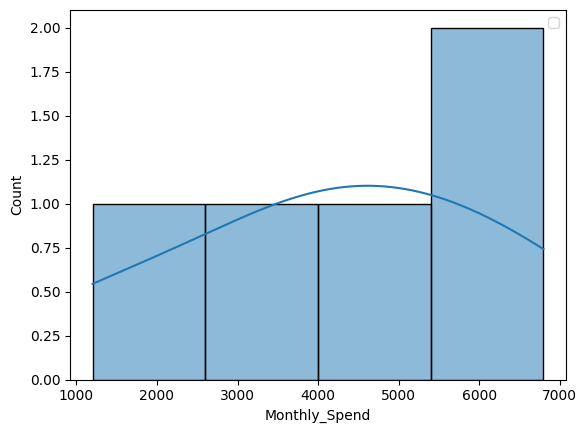

In [82]:
sns.histplot(
    df['Monthly_Spend'],
    kde= True
)
plt.legend()
plt.show()

In [83]:
corr = df.corr()
corr

,Age,Income,Website_Time,Discount_Used,Monthly_Spend
Age,1.000000,0.999647,0.187126,-0.856729,0.868602
Income,0.999647,1.000000,0.192364,-0.864828,0.874473
Website_Time,0.187126,0.192364,1.000000,-0.176090,0.627485
Discount_Used,-0.856729,-0.864828,-0.176090,1.000000,-0.814867
Monthly_Spend,0.868602,0.874473,0.627485,-0.814867,1.000000


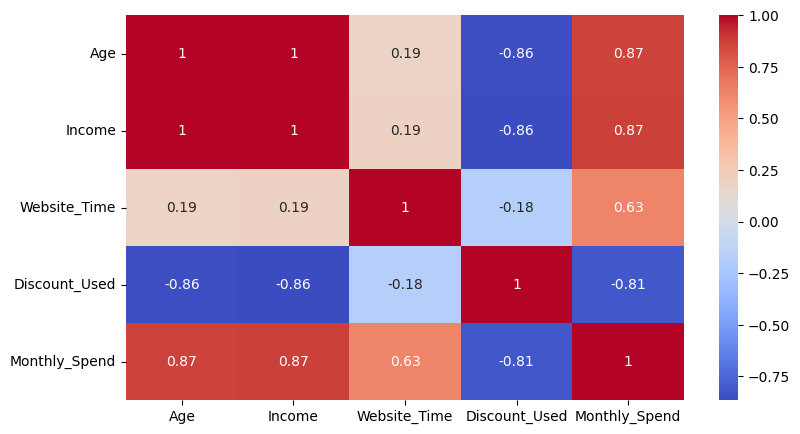

In [84]:
plt.figure(figsize=(9,5))
sns.heatmap(
    corr,
    cmap = "coolwarm",
    annot= True
)
plt.show()

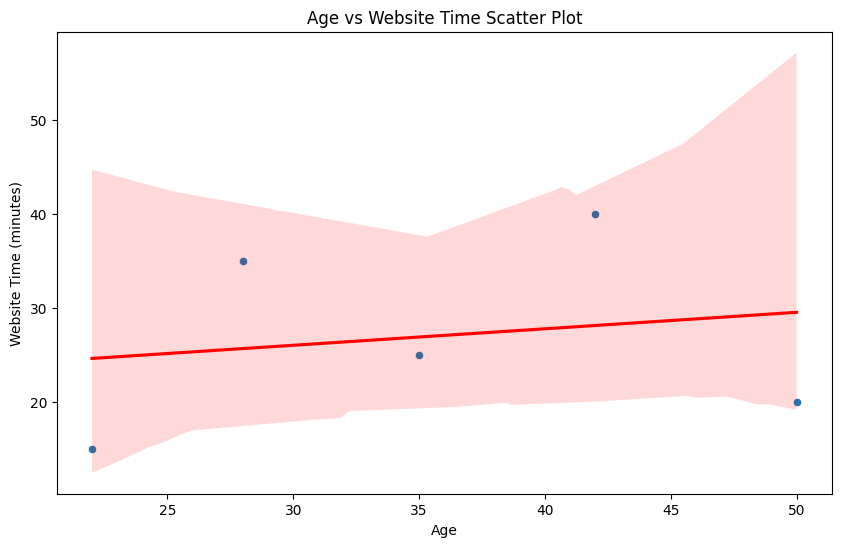

In [85]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x=df['Age'],
    y=df['Website_Time']
)
sns.regplot(
    x=df['Age'],
    y=df['Website_Time'],
    scatter= False,
    color='red'
)
plt.title("Age vs Website Time Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Website Time (minutes)")
plt.show()

In [86]:
df[['Age', 'Website_Time']].corr()

,Age,Website_Time
Age,1.000000,0.187126
Website_Time,0.187126,1.000000


<Figure size 1000x600 with 0 Axes>

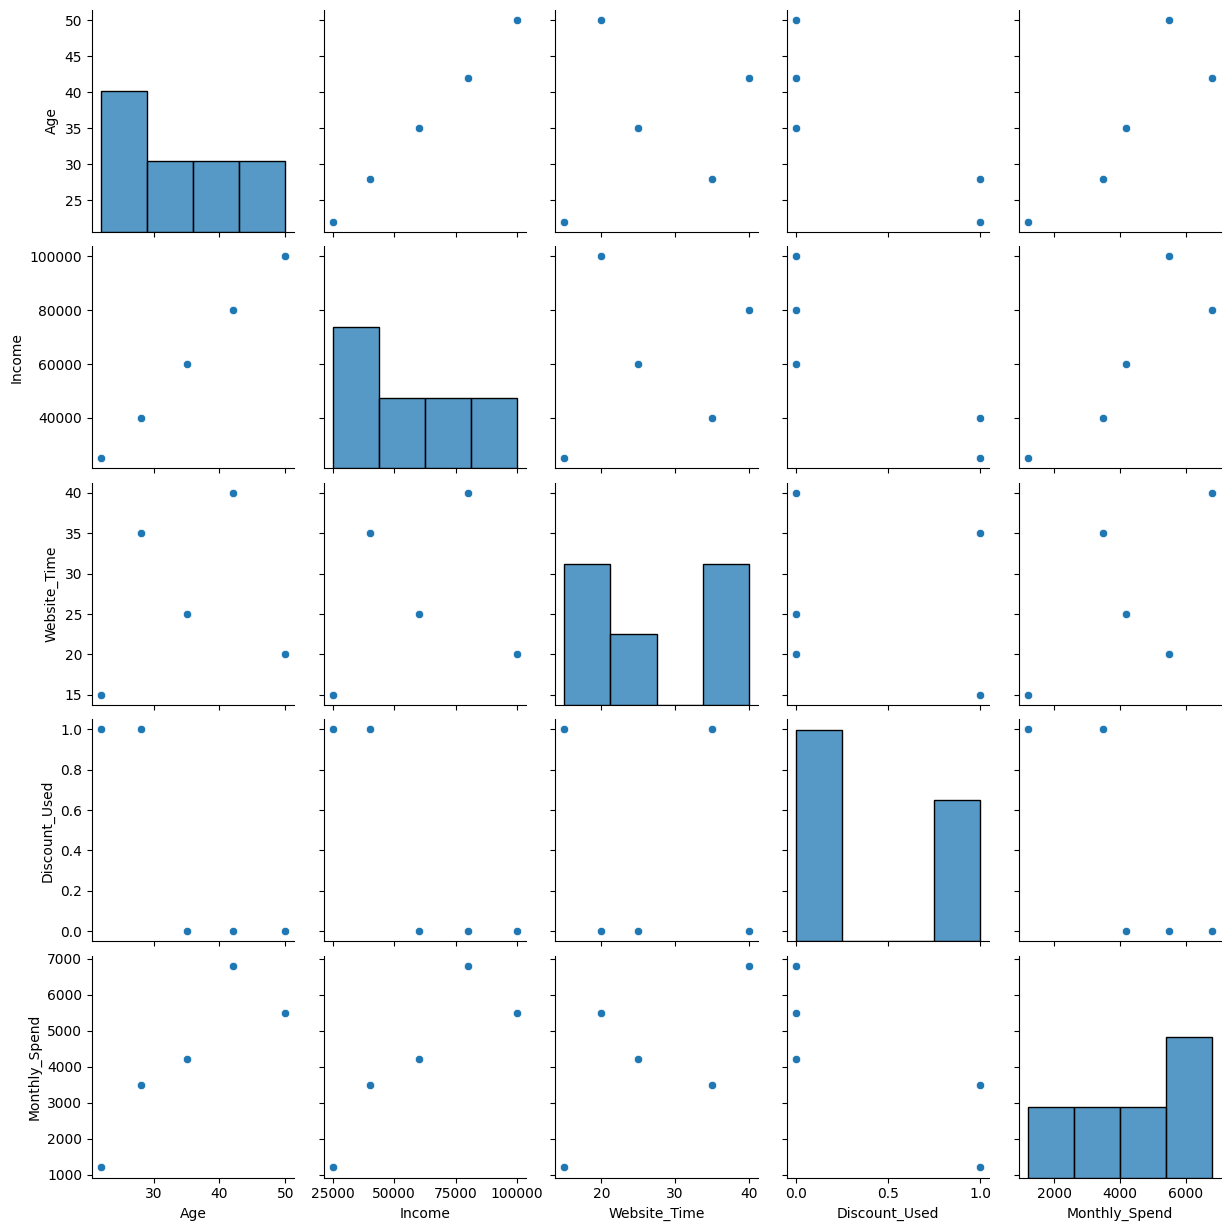

In [87]:
plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.show()

In [88]:
column_data = data['Income']

q2 = np.median(column_data)
q1 = np.percentile(column_data, 25, method='midpoint')
q3 = np.percentile(column_data, 75, method='midpoint')

print("Q1: ", q1)
print("Q2: ", q2)
print("Q3: ", q3)

iqr = q3 - q1
print("IQR: ", iqr)

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

outlier = []
for x in column_data:
    if x < lower_bound or x > upper_bound:
        outlier.append(x)
print("Outliers: ", x)




Q1:  47500.0
Q2:  65000.0
Q3:  85000.0
IQR:  37500.0
Lower Bound:  -8750.0
Upper Bound:  141250.0
Outliers:  180000


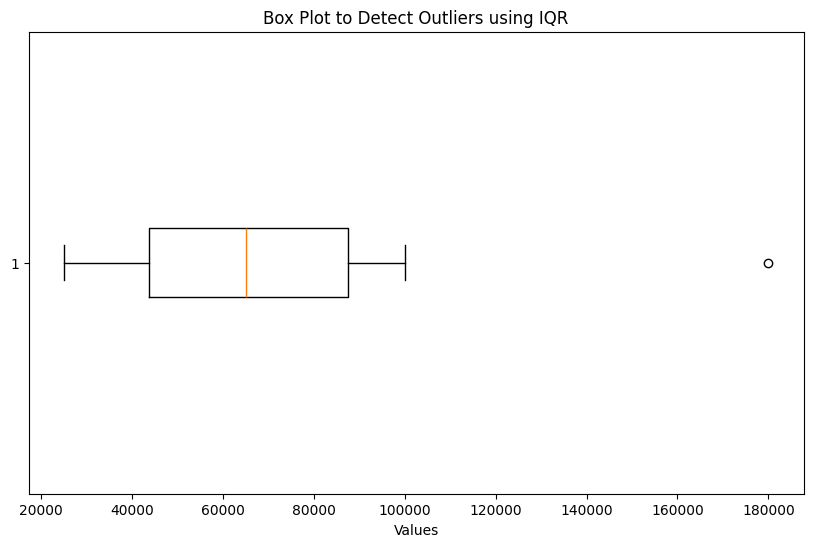

In [89]:
plt.figure(figsize=(10,6))
plt.boxplot(column_data, vert=False)
plt.title("Box Plot to Detect Outliers using IQR")
plt.xlabel("Values")
plt.show()